# Ensemble methods
## Marcin Biela 302959

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [122]:
# Load dataset
data = load_wine()

In [123]:
# Split data to data and target
X = data['data']
y = data['target']

In [124]:
np.unique(y)

array([0, 1, 2])

### Single Decision Tree

In [125]:
decissionTreeClf = DecisionTreeClassifier(random_state=1, min_samples_leaf=3)
decissionTreeCv = cross_val_score(decissionTreeClf, X, y)
decissionTreeCv

array([0.94444444, 0.80555556, 0.80555556, 0.91428571, 0.97142857])

### Bagged Decision Tree

In [126]:
baggingClf = BaggingClassifier(base_estimator=decissionTreeClf, n_estimators=50, random_state=1)
baggingClf.fit(X, y)
baggingClassifierCv = cross_val_score(baggingClf, X, y)
baggingClassifierCv

array([0.91666667, 0.91666667, 0.94444444, 0.97142857, 1.        ])

### Ada Boost algorithm for decistion trees

In [127]:
adaBoostClf = AdaBoostClassifier(algorithm='SAMME', n_estimators=50, random_state=1)
adaBoostClf.fit(X, y)
adaBoostClassifierCV = cross_val_score(adaBoostClf, X, y)
adaBoostClassifierCV

array([0.83333333, 0.91666667, 0.91666667, 1.        , 1.        ])

### Gradient Boosting algorithm for decision trees

In [128]:
gradientBoostingClf =  GradientBoostingClassifier(learning_rate=1.0, subsample=0.5, n_estimators=50, min_samples_leaf=3, max_depth=1)
gradientBoostingClf.fit(X, y)
gradientBoostingCv = cross_val_score(gradientBoostingClf, X, y)
gradientBoostingCv

array([0.91666667, 0.94444444, 0.97222222, 0.88571429, 1.        ])

In [129]:
result = f"""
Decission Tree scores: {decissionTreeCv} ===> average: {np.round(np.mean(decissionTreeCv), 4)} \n
Bagging scores: {baggingClassifierCv} ===> average: {np.round(np.mean(baggingClassifierCv), 4)} \n
AdaBoost scores: {adaBoostClassifierCV} ===> average: {np.round(np.mean(adaBoostClassifierCV), 4)} \n
GradientBoosting scores: {gradientBoostingCv} ===> average: {np.round(np.mean(gradientBoostingCv), 4)} \n
"""

print(result)


Decission Tree scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857] ===> average: 0.8883 

Bagging scores: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ] ===> average: 0.9498 

AdaBoost scores: [0.83333333 0.91666667 0.91666667 1.         1.        ] ===> average: 0.9333 

GradientBoosting scores: [0.91666667 0.94444444 0.97222222 0.88571429 1.        ] ===> average: 0.9438 




## Determine an approximated number of iterations after which the Gradient Boosting model yields almost no further improvement by following these steps
- Fit the model on the whole dataset.
- Compute the cumulative improvement, i.e. the OOB loss (call numpy.cumsum() function with GradientBoostingClassifier.oob_improvement_ attribute as its argument).
- Prepare a plot of the above-mentioned OOB loss with respect to the number of iterations.


In [130]:
noIteration = np.cumsum(gradientBoostingClf.oob_improvement_)
len(noIteration)

50

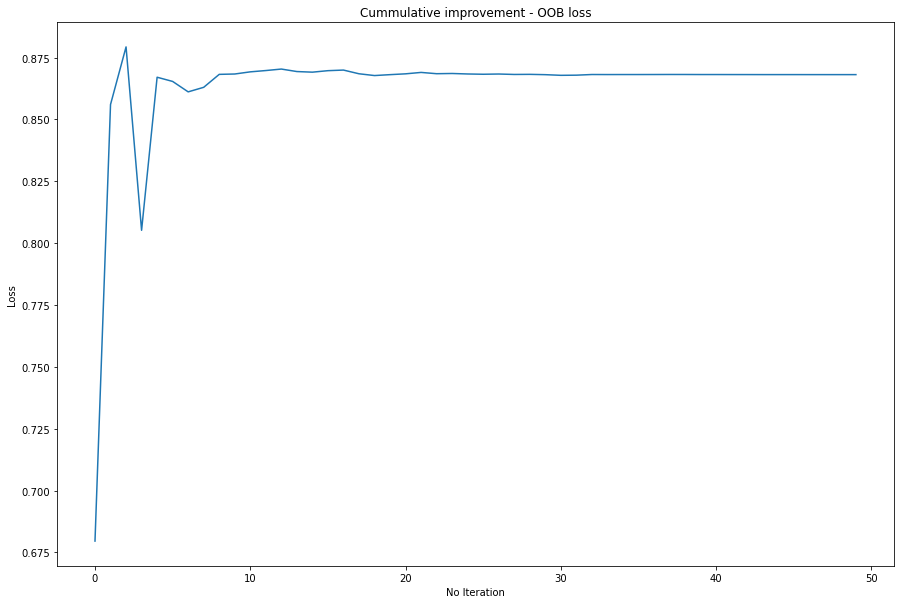

In [131]:
fig, ax = plt.subplots()
fig.set_size_inches((15, 10))
ax.plot(noIteration)
ax.set_title(" Cummulative improvement - OOB loss ")
ax.set_xlabel("No Iteration")
ax.set_ylabel("Loss")
plt.show()